## GOLD PRICE PREDICTION

Group Members:

1. 21051669 - Pratik Singh
2. 21052647 - Akshit Aggarwal
3. 21052746 - Ayan Bera
4. 21052897 - Ankit Hati

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## Loading the data set

In [3]:
#loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('gold_price_data.csv')

## Fetching the first 5 rows 

In [4]:
#print first 5 rows in the dataFrame
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


## Fetching the last 5 rows in the dataFrame

In [5]:
 #print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


## To count the number of rows and columns

In [6]:
#number of rows and columns
gold_data.shape

(2290, 6)

## Getting some basic information(type of data)

In [7]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


## Checking if there is any missing values and the count of them

In [8]:
#checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

## Statistical infromation

In [9]:
#getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


## Correlation:
1. Positive correlation
2. Negative Correlation


In [10]:
numeric_data = gold_data.select_dtypes(include= [np.number])
correlation = numeric_data.corr()

## Correlation Visualization

<Axes: >

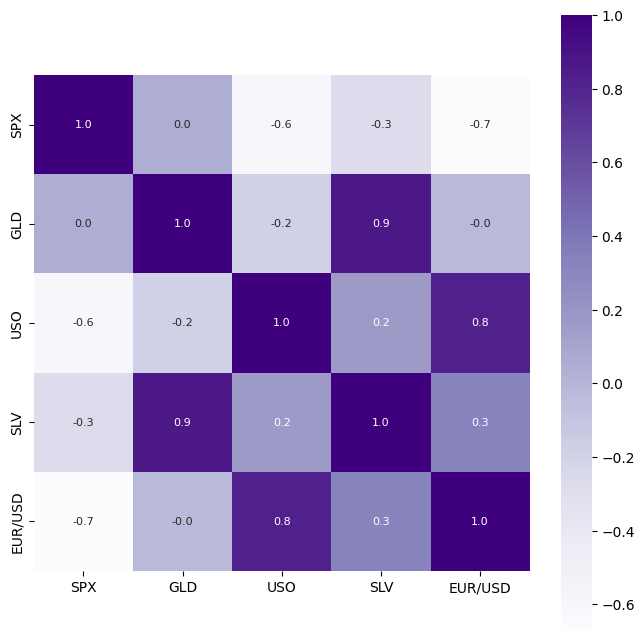

In [11]:
# constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Purples')

In [12]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


## Maximum Density of Gold Price

C:\Users\KIIT\AppData\Local\Temp\ipykernel_10764\2971018587.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color = 'green')


<Axes: xlabel='GLD', ylabel='Density'>

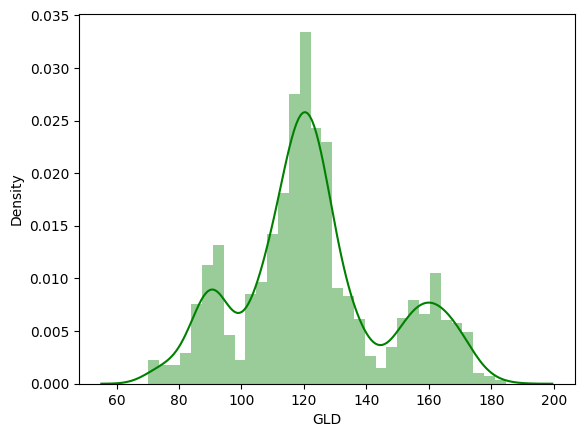

In [14]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'], color = 'green')

## Splitting the Data for Training

In [15]:
x = gold_data.drop(['Date','GLD'],axis=1)
y = gold_data['GLD']

In [16]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [17]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# Splitting into Training data and Test Dataset


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 2)

# Model Used:
## Random Forest Regresssor

In [19]:
regressor = RandomForestRegressor(n_estimators = 100)

In [20]:
# Training the model
regressor.fit(x_train,y_train)

RandomForestRegressor()

# Predicting the values

In [21]:
#prediction on Test Data
test_data_prediction = regressor.predict(x_test)

In [22]:
print(test_data_prediction)

[168.67690005  82.16309975 115.97890002 127.51400065 120.50360113
 154.52049758 150.42669812 126.05140005 117.44609877 125.95790086
 116.46660079 172.31560054 141.88069887 167.71959748 115.2854999
 117.57130072 138.75790252 170.23660149 158.86480291 158.62479986
 155.13360009 125.61760054 175.6933001  157.41750324 125.21730045
  93.98239971  77.92649961 120.34410033 119.07119931 167.48729951
  88.22060033 125.18640016  91.1357006  117.57740047 121.01249976
 136.08630041 115.30590129 115.17740103 146.18609972 107.34410065
 104.57550262  87.23389796 126.51690038 117.91859995 153.15009871
 119.69790019 108.39170005 108.15919818  93.34520054 127.18429745
  74.69400051 113.6547988  121.23519993 111.18859925 118.84929897
 120.36089919 159.74719937 167.55620131 147.06449706  85.81439843
  94.45510054  86.79799865  90.52339991 119.04280058 126.47340093
 127.3200007  170.05509993 122.36529938 117.43979881  98.73320031
 168.18610039 142.94339771 131.97490235 120.99160224 121.7154994
 119.7033004

# Accuracy

In [23]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.9889264831140896


# Comparing  the Actual Values and Predicted Values in a plot 

In [24]:
y_test = list(y_test)

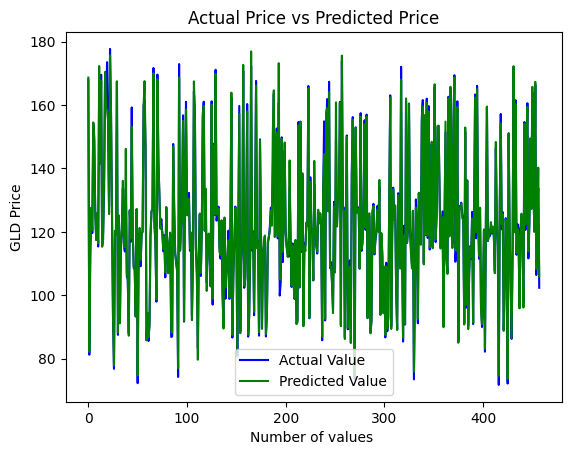

In [25]:
plt.plot(y_test,color='blue',label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label = 'Predicted Value')
plt.title("Actual Price vs Predicted Price")
plt.xlabel('Number of values ')
plt.ylabel('GLD Price')
plt.legend()
plt.show()